# Describing Function Analysis

In [120]:
import numpy as np
import matplotlib.pyplot as plt
import control
from system_sim import System

In [121]:
SIM_TIME = 20
T_STEP = 0.01

s = control.tf('s')

## Define System

### Laplace Representation

In [122]:
G = 1/(s*(s+1))
G

TransferFunction(array([1]), array([1, 1, 0]))

### State Space

In [123]:
G_ss = control.tf2ss(G)
G_ss

StateSpace(array([[-1., -0.],
       [ 1.,  0.]]), array([[1.],
       [0.]]), array([[0., 1.]]), array([[0.]]))

### Open Loop Response of System

In [124]:
sys_ol = System(G_ss, T_STEP)

u = []
y_ol = []
t = []

for i in range(int(SIM_TIME/T_STEP)):
    u.append(1)
    y_ol.append(sys_ol(1))
    t.append(sys_ol.t_step*i)
    

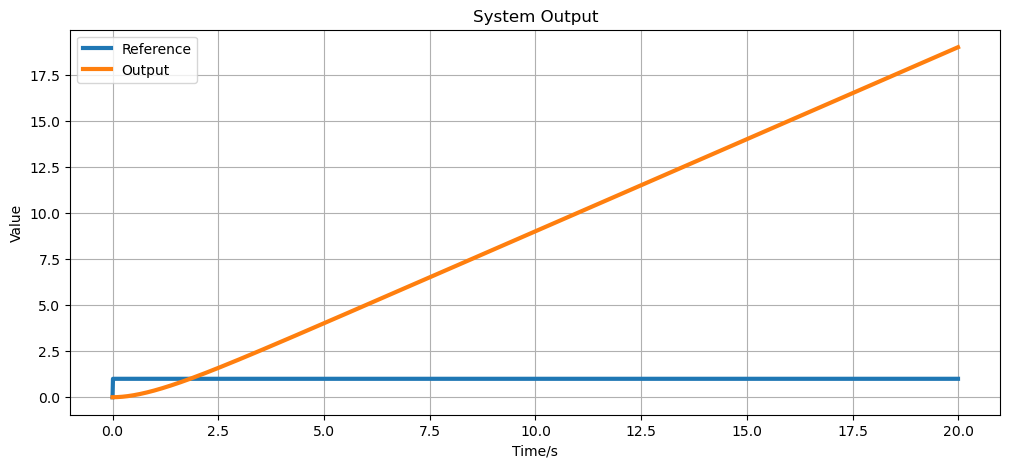

In [125]:
u[0] = 0

plt.figure(figsize=(12,5))
plt.grid()
plt.plot(t, u, linewidth=3)
plt.plot(t, y_ol, linewidth=3)
plt.xlabel("Time/s")
plt.ylabel("Value")
plt.legend(["Reference", "Output"])
plt.title("System Output")

plt.show()

### Closing the loop

New transfer function will be $ \frac{G(s)}{1+G(s)} $

In [126]:
G_cl = G/(1+G)
G_cl

TransferFunction(array([1, 1, 0]), array([1, 2, 2, 1, 0]))

In [127]:
G_cl_ss = control.tf2ss(G_cl)
G_cl_ss

StateSpace(array([[-2., -2., -1., -0.],
       [ 1.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.],
       [ 0.,  0.,  1.,  0.]]), array([[1.],
       [0.],
       [0.],
       [0.]]), array([[0., 1., 1., 0.]]), array([[0.]]))

### Simulating using Closed Loop Transfer Function

In [128]:
sys_cl = System(G_cl_ss, T_STEP)

u = []
y_cl = []
t = []

for i in range(int(SIM_TIME/T_STEP)):
    u.append(1)
    y_cl.append(sys_cl(1))
    t.append(sys_cl.t_step*i)
    

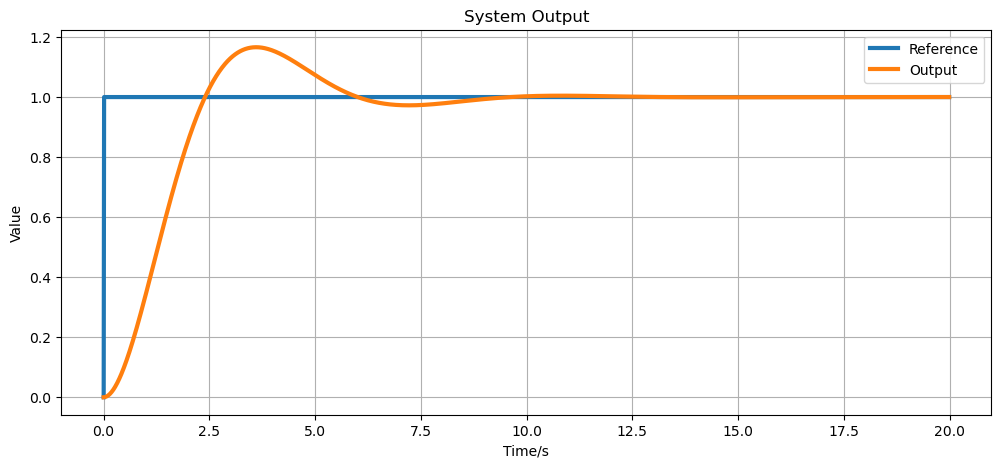

In [129]:
u[0] = 0

plt.figure(figsize=(12,5))
plt.grid()
plt.plot(t, u, linewidth=3)
plt.plot(t, y_cl, linewidth=3)
plt.xlabel("Time/s")
plt.ylabel("Value")
plt.legend(["Reference", "Output"])
plt.title("System Output")

plt.show()

### Simulating using Open Loop Transfer Function

In [130]:
sys_ol = System(G_ss, T_STEP)

u = [1]
y_cl_2 = [0]
t = [0]
e = [u[0]]

for i in range(1, int(SIM_TIME/T_STEP)):
    u.append(1)
    e.append(u[i-1]-y_cl_2[i-1])
    y_cl_2.append(sys_ol(e[i]))
    t.append(sys_ol.t_step*i)

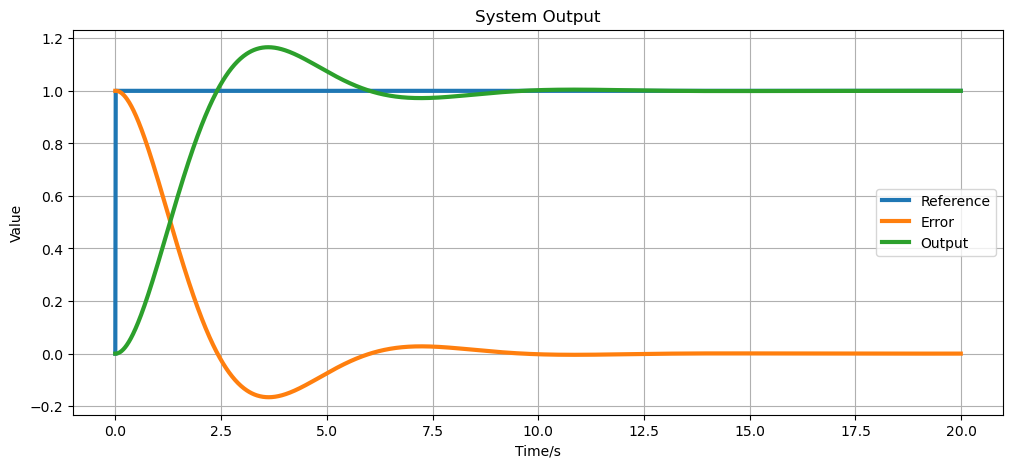

In [131]:
u[0] = 0

plt.figure(figsize=(12,5))
plt.grid()
plt.plot(t, u, linewidth=3)
plt.plot(t, e, linewidth=3)
plt.plot(t, y_cl_2, linewidth=3)
plt.xlabel("Time/s")
plt.ylabel("Value")
plt.legend(["Reference", "Error", "Output"])
plt.title("System Output")

plt.show()

### Nyquist Plot

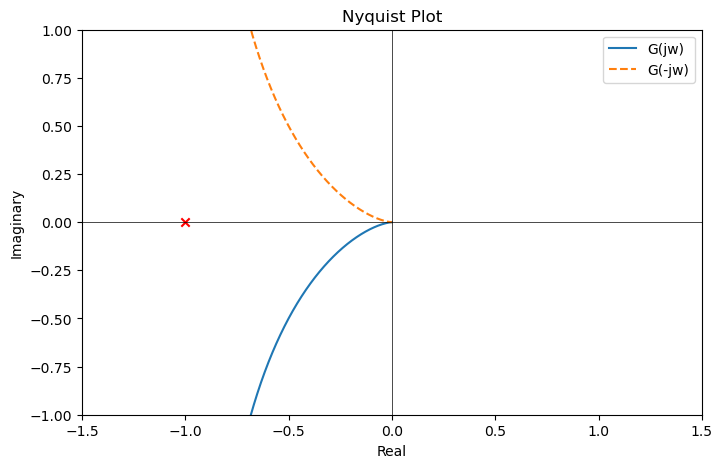

In [132]:
w = np.logspace(-4, 4, 10000)

GCp = G(1j*w)
GCn = G(-1j*w)

plt.figure(figsize=(8,5))
plt.plot(np.real(GCp), np.imag(GCp))
plt.plot(np.real(GCn), np.imag(GCn), linestyle='dashed')
plt.scatter(-1,0, c='red', marker='x')
plt.xlim([-1.5, 1.5])
plt.ylim([-1, 1])
plt.title("Nyquist Plot")
plt.xlabel("Real")
plt.ylabel("Imaginary")
plt.legend(["G(jw)", "G(-jw)"])
plt.axhline(0, color='black', linewidth=.5)
plt.axvline(0, color='black', linewidth=.5)
plt.show()